## Bank Marketing: 
##### The data is related with direct marketing campaigns of a Portuguese bankinginstitution. The marketing campaigns were based on phone calls. Often, more than one contact tothe same client was required, in order to access if the product (bank term deposit) would be (or not)subscribed.

####  The classification goal is to predict if the client will subscribe a term deposit (variable y) 

1 - age (numeric)<br>
2 - job : type of job (categorical:
"admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","bluecollar","self-employed","retired","technician","services")<br>
3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means
divorced or widowed)<br>
4 - education (categorical: "unknown","secondary","primary","tertiary")<br>
5 - default: has credit in default? (binary: "yes","no")<br>
6 - balance: average yearly balance, in euros (numeric)<br>
7 - housing: has housing loan? (binary: "yes","no")<br>
8 - loan: has personal loan? (binary: "yes","no")<br>
- related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular")<br>
10 - day: last contact day of the month (numeric)<br>
11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
12 - duration: last contact duration, in seconds (numeric)- other attributes:<br>
13 - campaign: number of contacts performed during this campaign and for this client (numeric,
includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous
campaign (numeric, -1 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical:
"unknown","other","failure","success")<br>
- output variable (desired target):
17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Bank Marketing Data Set.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [3]:
df=df.rename(columns={"V1":"age","V2":"job_type","V3":"marital","V4":"education","V5":"default","V6":"balance","V7":"housing_loan","V8":"personal_loan","V9":"contact","V10":"day","V11":"month","V12":"duration","V13":"campaign","V14":"pdays","V15":"previous","V16":"poutcome"})
df.head()

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


## replace the target value

In [4]:
df["Class"]=df["Class"].replace({1:0,2:1})

## check for null values

In [5]:
df.isnull().sum()

age              0
job_type         0
marital          0
education        0
default          0
balance          0
housing_loan     0
personal_loan    0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Class            0
dtype: int64

# Univariate Analysis

# pdays

In [6]:
import sys
def contected(i):
    if i==-1:
        return "not_contacted"
    else:
        return "contacted"
        
df.pdays=df.pdays.apply(contected)

# previous

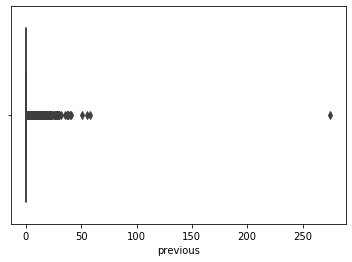

In [7]:
sns.boxplot(df.previous)

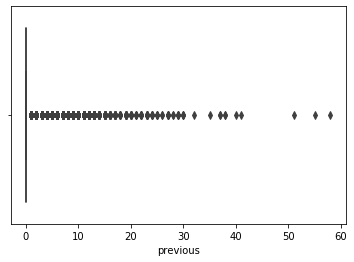

In [8]:
df=df[df.previous<=100]

sns.boxplot(df.previous)

# campaign

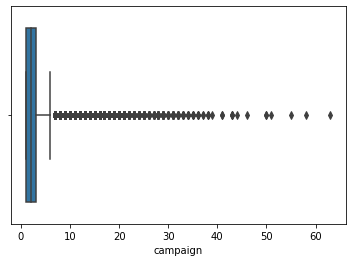

In [9]:
sns.boxplot(df.campaign)

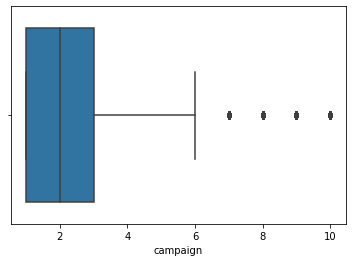

In [10]:
df=df[df.campaign<=10]

sns.boxplot(df.campaign)

# duration

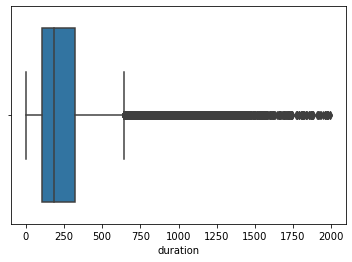

In [11]:
df=df[df.duration<2000]

sns.boxplot(df.duration)

# balance

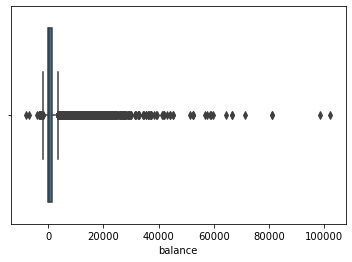

In [12]:
sns.boxplot(df.balance)

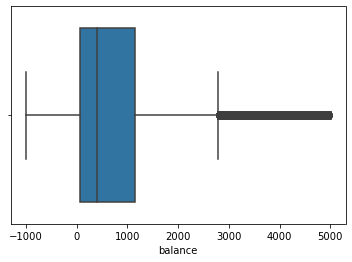

In [13]:
df=df[(df.balance>-1000) & (df.balance<5000)]

sns.boxplot(df.balance)

# age

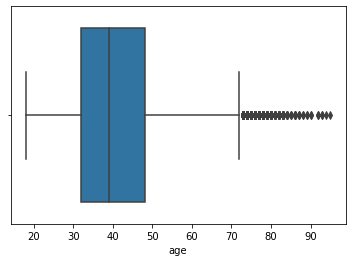

In [14]:
sns.boxplot(df.age)

In [15]:
df=df[df.age<80]

df=df.reset_index(drop=True)
df

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,not_contacted,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,not_contacted,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,not_contacted,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,not_contacted,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,not_contacted,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40922,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,not_contacted,0,unknown,1
40923,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,not_contacted,0,unknown,1
40924,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,not_contacted,0,unknown,1
40925,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,not_contacted,0,unknown,0


## split the data

In [83]:
X=df.drop('Class',1)
Y=df['Class']

In [84]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=32)

In [85]:
xtrain.head(2)

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9077,57,technician,divorced,secondary,no,164,no,no,unknown,9,jun,139,2,not_contacted,0,unknown
8261,32,blue-collar,divorced,secondary,no,880,yes,yes,unknown,4,jun,112,1,not_contacted,0,unknown


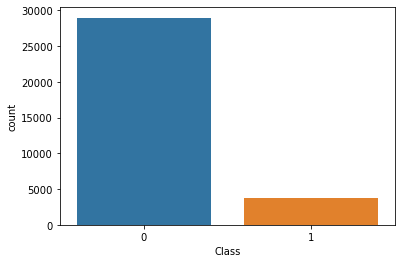

In [86]:
sns.countplot(ytrain)

In [20]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def performance_measures(model,X_train,Y_train, store_results=True):
    
    test_acc = cross_val_score(model, X_train, Y_train, cv=kf, n_jobs=-1, scoring='accuracy')
    test_acc = np.around(test_acc, decimals=4)
    test_f1 = cross_val_score(model, X_train, Y_train, cv=kf, n_jobs=-1, scoring='f1')
    test_f1 = np.around(test_f1, decimals=4)
    test_auc = cross_val_score(model, X_train, Y_train, cv=kf, n_jobs=-1, scoring='roc_auc')
    test_auc = np.around(test_auc, decimals=4)
    mean_test_acc = np.around(np.mean(test_acc), decimals=4)
    sd_test_acc = np.around(np.std(test_acc), decimals=4)
    #print("CV Test Accuracy Scores: ", test_acc)
    print("Mean Accuracy: {} (S.D = {})".format(mean_test_acc, sd_test_acc))
    print("Mean F1 score: {} (S.D = {})".format(np.around(np.mean(test_f1),decimals=4), np.around(np.std(test_f1),decimals=4)))
    print("Mean Auc score: {} (S.D = {})".format(np.around(np.mean(test_auc),decimals=4), np.around(np.std(test_auc),decimals=4)))
    

## save the test data in pickle format

In [20]:
pickle.dump(xtest, open('test_inpv1', 'wb'))
pickle.dump(ytest, open('test_outv1', 'wb'))

## save the categorical and numical feature in pickle format

In [21]:
feat_num = list(xtrain.select_dtypes(include=np.number).columns)
feat_cat = list(xtrain.select_dtypes(exclude=np.number).columns)

In [22]:
feat_num

['age', 'balance', 'day', 'duration', 'campaign', 'previous']

In [23]:
feat_cat

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'contact',
 'month',
 'pdays',
 'poutcome']

In [23]:
pickle.dump(feat_num, open('feat_numv1', 'wb'))
pickle.dump(feat_cat, open('feat_catv1', 'wb'))

## create a pipeline

In [24]:
data_pipeline = ColumnTransformer([
    ('numerical', StandardScaler(), feat_num),
    ('categorical', OneHotEncoder(drop="first"), feat_cat)
    ],remainder = 'passthrough')



data_clean=data_pipeline.fit_transform(xtrain)

In [52]:
filename = 'data_pipelinev1'
pickle.dump(data_pipeline, open(filename, 'wb'))

# Start builing different model

# logistic

In [26]:
tuned_paramaters = {'C':[0.01, 0.1, 1, 10], 'penalty':['l1', 'l2']}
 
# instantiate the 'KNeighborsClassifier' 
lr_classification = LogisticRegression(class_weight='balanced')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
lr_grid = GridSearchCV(estimator = lr_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'f1',n_jobs=-1)

# fit the model on X_train and y_train using fit()
lr_grid.fit(data_clean, ytrain)

# get the best parameters
print('Best parameters for LR Classifier: ', lr_grid.best_params_, '\n')

Best parameters for LR Classifier:  {'C': 1, 'penalty': 'l2'} 



C:\Users\Gunand\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [27]:
lr_model=LogisticRegression(C=1,penalty="l2",class_weight='balanced')
performance_measures(lr_model,data_clean,ytrain)

Mean Accuracy: 0.8453 (S.D = 0.0048)
Mean F1 score: 0.5489 (S.D = 0.014)
Mean Auc score: 0.9098 (S.D = 0.0036)


# xgboost

In [29]:
weight=int(ytrain.value_counts()[0]/ytrain.value_counts()[1])
weight

7

In [30]:
from xgboost.sklearn import XGBClassifier
tuning_parameters = {'learning_rate': [ 0.1,0.2, 0.3, 0.4, 0.5],
                     'max_depth': [3,5,8,10],
                     'n_estimators':[10,20,50,100,120],
                     'gamma': [0,1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier(scale_pos_weight=weight)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'f1',n_jobs=-1,verbose=True)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(data_clean, ytrain)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 20.0min finished


Best parameters for XGBoost classifier:  {'gamma': 4, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 100} 



In [31]:
xg_model=XGBClassifier(gamma= 4, learning_rate= 0.2, max_depth=8,n_estimators=100,scale_pos_weight=weight)
performance_measures(xg_model,data_clean,ytrain)

Mean Accuracy: 0.8828 (S.D = 0.0047)
Mean F1 score: 0.6066 (S.D = 0.0172)
Mean Auc score: 0.9281 (S.D = 0.0037)


# adaboost

In [35]:
from sklearn.ensemble import AdaBoostClassifier
tuning_parameters = {'learning_rate': [ 0.1,0.2, 0.3, 0.4, 0.5],
                     
                     'n_estimators':[10,20,50,100,120]
                     }

# instantiate the 'XGBClassifier' 
ada_model = AdaBoostClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3, scoring = 'f1',n_jobs=-1,verbose=True)

# fit the model on X_train and y_train using fit()
ada_grid.fit(data_clean,ytrain)

# get the best parameters
print('Best parameters for AdaBoost classifier: ', ada_grid.best_params_, '\n')

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   30.5s finished


Best parameters for AdaBoost classifier:  {'learning_rate': 0.5, 'n_estimators': 100} 



In [36]:
ada_model = AdaBoostClassifier(n_estimators = 100, random_state = 10,learning_rate=0.5)
performance_measures(ada_model,data_clean,ytrain)

Mean Accuracy: 0.9016 (S.D = 0.0023)
Mean F1 score: 0.4524 (S.D = 0.0132)
Mean Auc score: 0.9109 (S.D = 0.0051)


# gradient boost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
tuning_parameters = {'learning_rate': [ 0.1,0.2, 0.3, 0.4, 0.5],
                     'max_depth': [3,5,8,10],
                     'n_estimators':[10,20,50,100,120]
                     }

# instantiate the 'XGBClassifier' 
gb_model = GradientBoostingClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
gb_grid = GridSearchCV(estimator = gb_model, param_grid = tuning_parameters, cv = 3, scoring = 'f1',n_jobs=-1,verbose=True)

# fit the model on X_train and y_train using fit()
gb_grid.fit(data_clean,ytrain)

# get the best parameters
print('Best parameters for GBoost classifier: ', gb_grid.best_params_, '\n')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.6min finished


Best parameters for GBoost classifier:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 120} 



In [41]:
gb_model = GradientBoostingClassifier(n_estimators = 120, random_state = 10,learning_rate=0.1,max_depth=8)
performance_measures(gb_model,data_clean,ytrain)

Mean Accuracy: 0.9066 (S.D = 0.0036)
Mean F1 score: 0.546 (S.D = 0.01)
Mean Auc score: 0.9289 (S.D = 0.004)


# built model with xgboost

In [45]:
from xgboost.sklearn import XGBClassifier
my_mod=XGBClassifier(gamma= 4, learning_rate= 0.2, max_depth=8,n_estimators=100,scale_pos_weight=weight).fit(data_clean,ytrain)

In [46]:
filename = 'xgmodel.model'
my_mod.save_model(filename)

# built model using gradientboost

In [91]:
gb_model = GradientBoostingClassifier(n_estimators = 120, random_state = 10,learning_rate=0.1,max_depth=8).fit(data_clean,ytrain)

In [92]:
filename = 'gb_model'
pickle.dump(gb_model, open(filename, 'wb'))

## test the score on test data

In [93]:
xtest.head()

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome
9886,55,blue-collar,married,primary,no,2896,no,no,unknown,17,jun,138,3,not_contacted,0,unknown
9741,38,self-employed,married,secondary,no,30,no,no,unknown,16,jun,91,1,not_contacted,0,unknown
3730,30,technician,married,secondary,no,1011,yes,no,unknown,16,may,109,1,not_contacted,0,unknown
33139,39,blue-collar,married,primary,no,398,yes,no,cellular,12,may,256,1,not_contacted,0,unknown
31059,35,technician,single,tertiary,no,174,yes,no,cellular,5,may,105,1,not_contacted,0,unknown


In [94]:
age=65
job_type="self-employed"
marital="single"
education="primary"
default="no"
balance=2899
housing_loan="no"
personal_loan="yes"
contact="cellular"
day="2"
month="may"
duration=34
campaign=2
pdays="contacted"
previous=1
poutcome="unknown"

In [95]:
xtrain.columns

Index(['age', 'job_type', 'marital', 'education', 'default', 'balance',
       'housing_loan', 'personal_loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome'],
      dtype='object')

In [96]:
test=pd.DataFrame([[age, job_type, marital, education, default, balance,
       housing_loan, personal_loan, contact, day, month, duration,
       campaign, pdays, previous, poutcome]])
test.columns=xtrain.columns
xtest1=pd.concat([xtest,test])

In [97]:
xtest1_clean=data_pipeline.fit_transform(xtest1)

In [98]:
ypred1=gb_model.predict(xtest1_clean)
print(ypred1[-1])

0


In [99]:
if ypred1[-1] == 0:
    print("the client is not likely to subscribe bank deposit")
else:
    print("the client is likely to subscribe bank deposit")

the client is not likely to subscribe bank deposit
